<h1 style="text-align:center;"><ins>STORE SALES ANALYSIS</ins></h1>

**Una tienda online de moda, con presencia en todo Brasil, necesita impulsar su rendimiento utilizando sus datos de manera estratégica. Como científico de datos, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:**

### **Preguntas**

1. ¿Cual es el Top 5 productos más vendidos históricamente?


2. ¿Cual es la evolución histórica de las ingresos netos?


3. ¿Cuáles son los ingresos netos por vendedor por año?


4. ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?


5. ¿Existe otro insight que puedas proporcionar?

## 1. IMPORTANDO LIBRERÍAS

In [1]:
!pip install Pillow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 2. CARGANDO NUESTROS DATAFRAMES

In [3]:
df_itens_pedidos = pd.read_csv('https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/itens_pedidos.csv')
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [4]:
df_pedidos = pd.read_csv('https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/pedidos.csv')
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [5]:
df_productos = pd.read_csv('https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/productos.csv')
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248.0,Usado


In [6]:
df_vendedores = pd.read_csv('https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/vendedores.csv')
df_vendedores

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca
5,6,Unknown


## 3. PREPROCESAMIENTO DE DATOS

 * Verificando todos nuestros dataframes, para observar valores nulos, duplicados y si corresponden sus respectivos tipos de datos.

### 3.1 Dataframe   df_itens_pedidos

In [7]:
## Visión general del dataframe
df_itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


In [8]:
## Validando si existen duplicados
df_itens_pedidos.duplicated().sum()

0

* Verificamos que no hay presencia de datos nulos, duplicados y los tipos de datos son correctos para todas las variables.

### 3.2 Dataframe   df_pedidos

In [9]:
## Visión general del dataframe
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pedido_id     24527 non-null  int64 
 1   producto_id   24527 non-null  int64 
 2   vendedor_id   24527 non-null  int64 
 3   fecha_compra  24527 non-null  object
 4   total         24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


In [10]:
## Validando si existen duplicados
df_pedidos.duplicated().sum()

0

In [11]:
## Modificando el tipo de dato de la variable 'fecha_compra'
df_pedidos['fecha_compra'] = pd.to_datetime(df_pedidos['fecha_compra'] )

In [12]:
## Verificando que se haya convertido el tipo de dato satisfactoriamente
print(df_pedidos['fecha_compra'].dtype)

datetime64[ns]


* Notamos que no había presencia de datos nulos ni duplicados. Sin embargo, nos dimos cuenta que la variable 'fecha_compra' estaba catalogada como tipo de dato **object**, debido a eso decidimos convertirlo en tipo de dato **datetime**.

### 3.3 Dataframe df_productos

In [13]:
## Visión general del dataframe
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   producto_id  207 non-null    int64  
 1   producto     205 non-null    object 
 2   precio       207 non-null    int64  
 3   marca        207 non-null    object 
 4   sku          205 non-null    float64
 5   condicion    207 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB


**VALORES NULOS**

* Observamos presencia de datos nulos, estos datos nulos lo analizaremos y decidiremos el proceder.

<Figure size 1000x500 with 0 Axes>

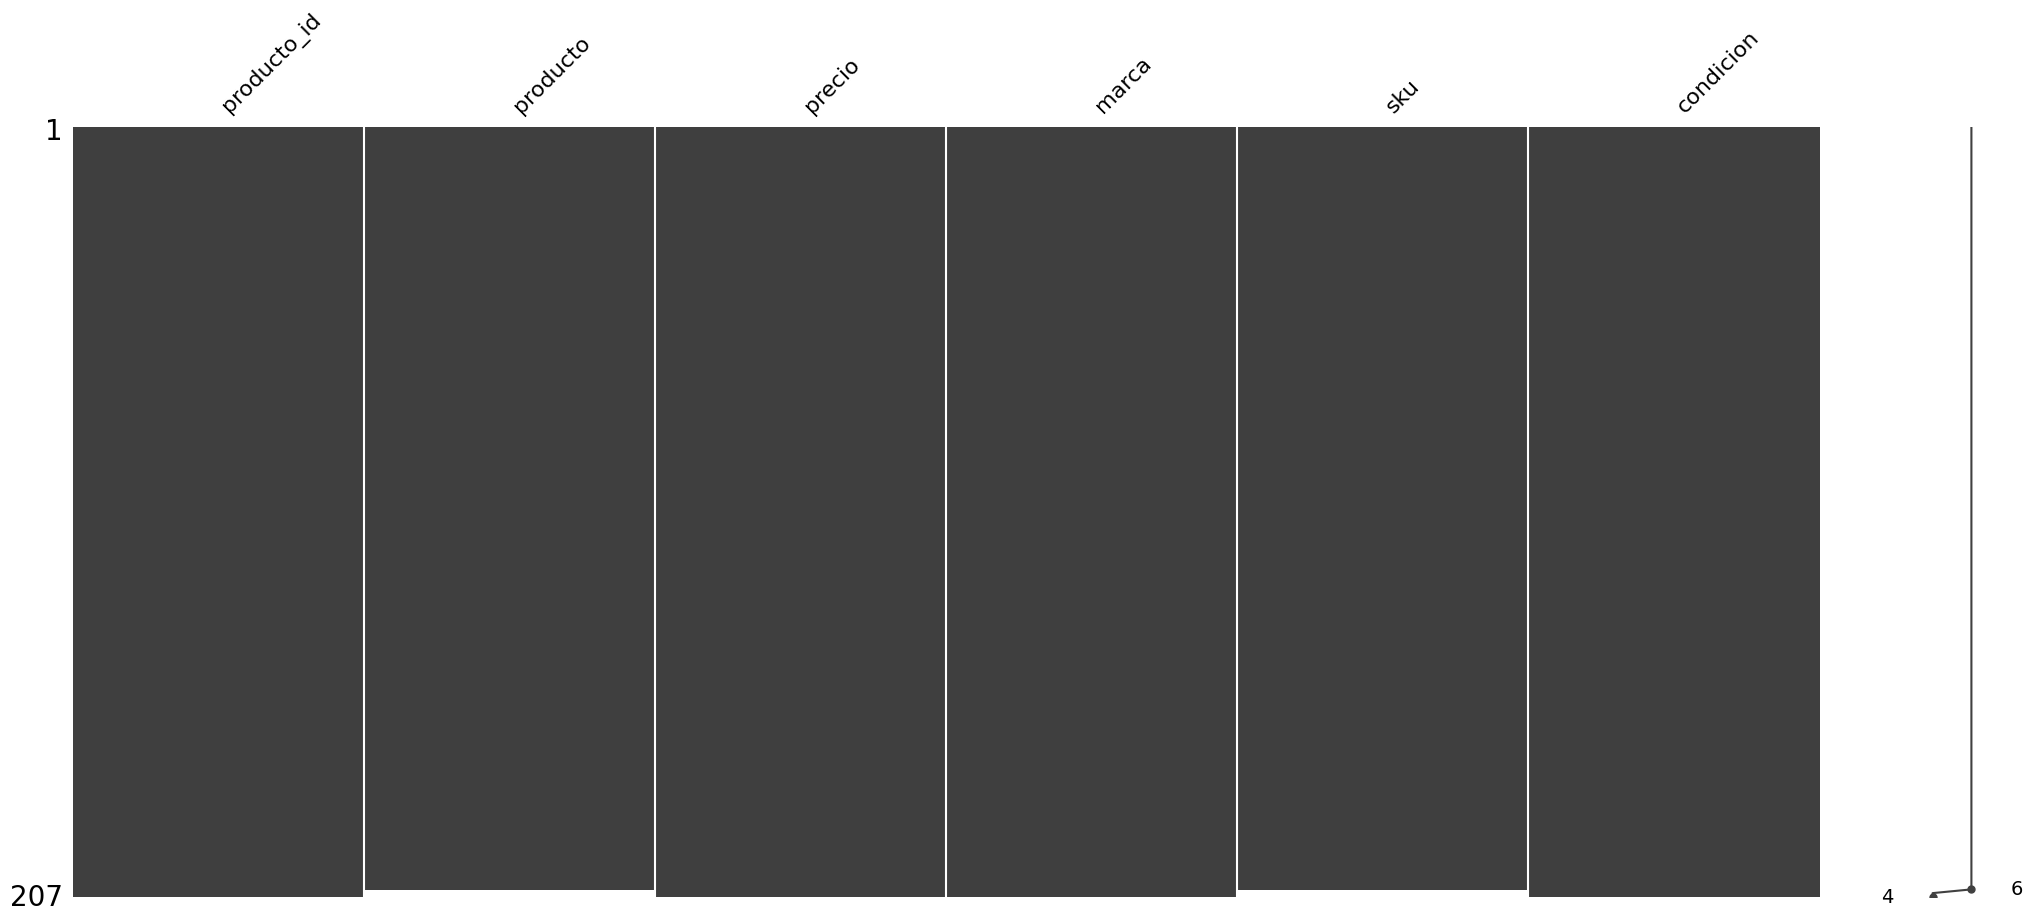

In [14]:
## Matriz de nulos
plt.figure(figsize=(10,5))
msno.matrix(df_productos)
plt.show()

* Notamos en la matriz de nulos que nuestros datos faltantes se encuentra la posición inferior de nuestro dataframe.
* Realizaremos un acercamiento para observar mejor la posición de estos valores faltantes.

In [15]:
## Observando las últimas filas de nuestro dataframe
df_productos.iloc[len(df_productos)-7:, :]

,producto_id,producto,precio,marca,sku,condicion
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858.0,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118.0,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931.0,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166.0,Usado
204,41518,Calca Jeans Basica,260,Banana Republic,255410.0,Nuevo con etiqueta
205,41598,NaN,260,Banana Republic,NaN,Nuevo con etiqueta
206,32926,NaN,210,Limone By Jade Seba,NaN,Nuevo sin etiqueta


* Nos damos cuenta, que poseemos dos datos nulos al final del dataframe.
* Verificaremos con el valor de la variable **'producto_id'** correspondiente para las filas donde tenemos presencia de datos nulos, si hay relación con los otros dataframes, ya que observamos que la esta variable está presente en los dataframes **'df_itens_pedidos' y 'df_pedidos'**.

In [16]:
# Encontrando los índices donde los valores de la columna 'producto' son nulos
indices_nulos = df_productos[df_productos['producto'].isnull()].index
indices_nulos

Index([205, 206], dtype='int64')

In [17]:
df_productos['producto_id'][indices_nulos[0]]

41598

In [18]:
## Verificando si existe el dato de 'producto_id' encontrado en una fila nula de 'df_productos', en el dataframe relacionado 'df_itens_pedidos'
df_itens_pedidos[(df_itens_pedidos['producto_id']==df_productos['producto_id'][indices_nulos[0]]) & (df_itens_pedidos['producto_id']==df_productos['producto_id'][indices_nulos[1]])]

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio


In [19]:
## Verificando si existe el dato de 'producto_id' encontrado en una fila nula de 'df_productos', en el dataframe relacionado 'df_pedidos'
df_pedidos[(df_pedidos['producto_id']==df_productos['producto_id'][indices_nulos[0]]) & (df_pedidos['producto_id']==df_productos['producto_id'][indices_nulos[1]])]

,pedido_id,producto_id,vendedor_id,fecha_compra,total


* Luego del análisis, notamos que estos valores de **'producto_id'**, que encontramos en el dataframe **'df_productos'**, correspondiente para las filas que poseen datos nulos, no afectan los datos de los dataframes relacionados **'df_itens_pedidos' y 'df_pedidos'**.
* Por consiguiente, decidimos eliminar estos valores, ya que no nos aportarían ningun valor para nuestros posteriores análisis.

In [20]:
## Eliminando los valores nulos del dataframe
df_productos = df_productos.dropna()

**DUPLICADOS**

In [21]:
df_productos.duplicated().sum()

0

**TIPOS DE DATOS**

* Generalmente los SKU son códigos alphanuméricos que nos representan a un producto determinado.
* En este caso en particular, notamos que los SKU son solo numéricos, pero están representados como float, debido a eso vamos a tener que convertir este tipo de dato a integer.

In [22]:
## Modificando el tipo de dato de la variable 'sku'
df_productos['sku'] = df_productos['sku'].astype('int64')

<ipython-input-22-d66ea785e2a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_productos['sku'] = df_productos['sku'].astype('int64')


In [23]:
print(df_productos['sku'].dtype)

int64


* Para este dataframe, observamos presencia de datos nulos los cuales decidimos eliminarlos. No se notó presencia de datos duplicados. La única variable del dataframe que necesitaba un ajuste del tipo de dato, era el **'sku'**, el cual modificamos de **float** a **integer**

### 3.4 Dataframe df_vendedores

In [24]:
## Visión general del dataframe
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   vendedor_id      6 non-null      int64 
 1   nombre_vendedor  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


* Verificamos que no hay presencia de datos nulos, duplicados y los tipos de datos son correctos para todas las variables.

### 3.5 Dataframes Preprocesados

In [25]:
print(df_itens_pedidos.info())
print('-------------'*3)
print(df_pedidos.info())
print('-------------'*3)
print(df_productos.info())
print('-------------'*3)
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB
None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pedido_id     24527 non-null  int64         
 1   producto_id   24527 non-null  int64         
 2   vendedor_id   24527 no

## 4. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### 4.1 df_itens_pedidos

In [26]:
## Verificando las columnas de nuestro dataframe
df_itens_pedidos.describe().columns

Index(['id_recibo', 'producto_id', 'pedido_id', 'cantidad', 'valor_unitario',
       'valor_total', 'costo_envio'],
      dtype='object')

In [27]:
## Eliminando la columna 'id_recibo'
df_itens_pedidos_new = df_itens_pedidos.drop(columns='id_recibo')
df_itens_pedidos_new

,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,41518,341,3,260,780,BR-BA,156.0
1,4307,1174,5,6175,30875,BR-RJ,6175.0
2,22407,1399,3,200,600,BR-PB,120.0
3,3820,1652,6,139,834,BR-DF,166.8
4,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...
24522,64127,63716,4,590,2360,BR-PE,472.0
24523,37384,63999,4,700,2800,BR-RO,560.0
24524,100932,64594,5,3900,19500,BR-RO,3900.0
24525,3820,64811,3,139,417,BR-MA,83.4


<Axes: >

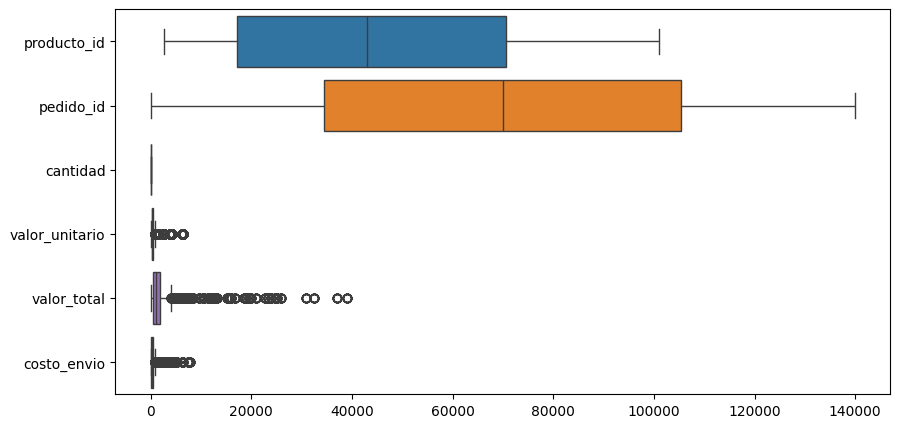

In [28]:
## Gráfico de boxplot para nuestros datos numéricos de df_itens_pedidos
plt.figure(figsize=(10,5))
sns.boxplot(df_itens_pedidos_new, orient='h')

* Observamos que las variables valor_unitario, valor_total y costo_envio, tienen datos que están muy alejados del resto. En esta situación, estos datos si bien son atípicos del conjunto de datos de la variable, lo dejamos de esta forma ya que no vamos a realizar predicciones.

* Estás variables con atípicos, nos indican que hay productos que tienen precios elevados, estos tendrán que observarse posteriormente para discriminarlos.

<ipython-input-29-f621c795a69f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_itens_pedidos_new['ciudad'].value_counts().index, y=df_itens_pedidos_new['ciudad'].value_counts(),


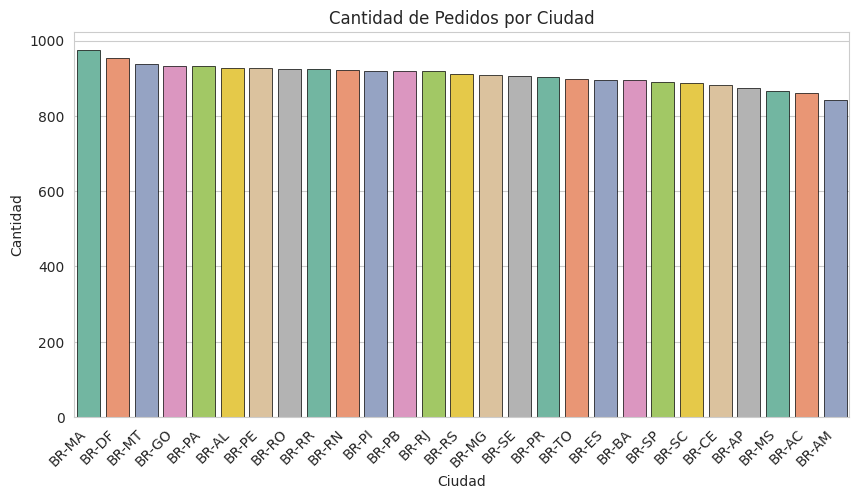

In [29]:
## Graficando cantidad de pedidos por ciudad
plt.figure(figsize=(10,5))

sns.set_style("whitegrid")
sns.barplot(x=df_itens_pedidos_new['ciudad'].value_counts().index, y=df_itens_pedidos_new['ciudad'].value_counts(),
            palette="Set2", edgecolor="black", linewidth=0.5,
            order=df_itens_pedidos_new['ciudad'].value_counts().index)

plt.title("Cantidad de Pedidos por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad")

plt.xticks(rotation=45, ha="right")

plt.show()

* Notamos que todas las ciudades tienen un margen de cantidad de pedidos muy parecido. Si podemos indicar algo, es que la ciudad BR-MA es la que tiene más pedidos y la ciudad BR-AM es la que tiene menos pedidos.

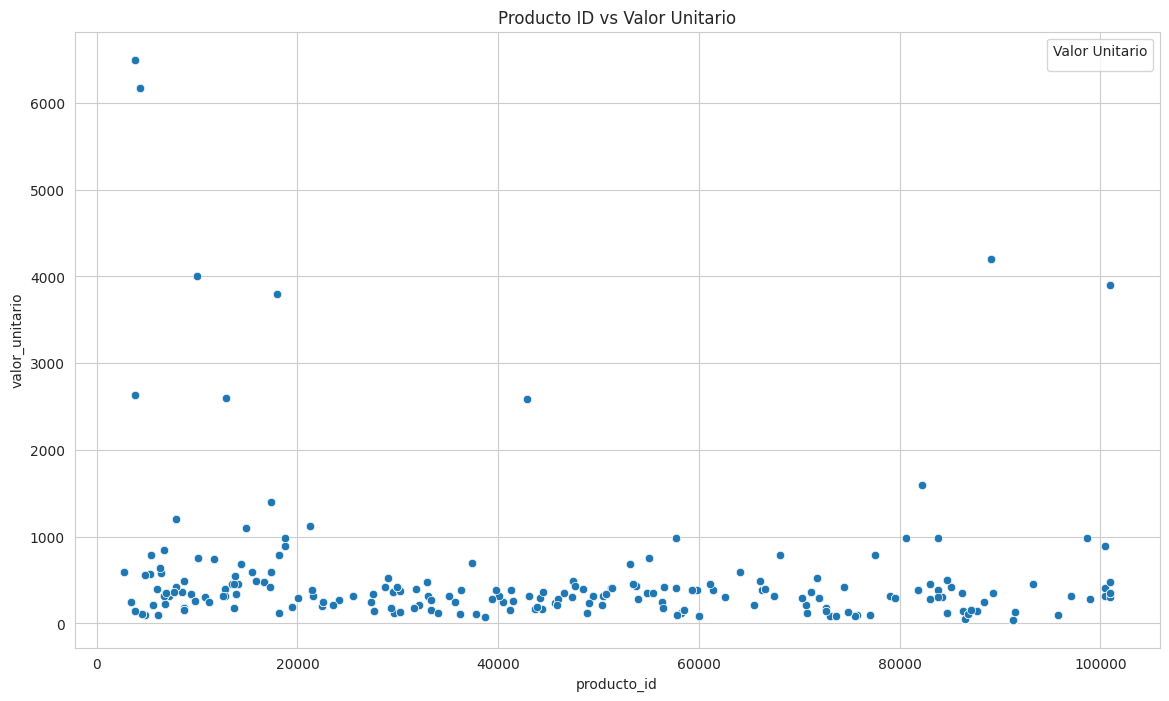

In [30]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_itens_pedidos, x='producto_id', y='valor_unitario')

plt.title('Producto ID vs Valor Unitario')
plt.legend(title='Valor Unitario')

# Mostrar el gráfico
plt.show()

* La figura nos muestra una comparación del precio de cada producto.
* Nos damos cuenta que hay productos que tienen precios muy elevados, pero son pocos, por encima de los 2000 reales.
* La mayoría de productos tienen precios menores de 1000 reales.
* Solo 2 productos tienen un precio mayor de 6000 reales.

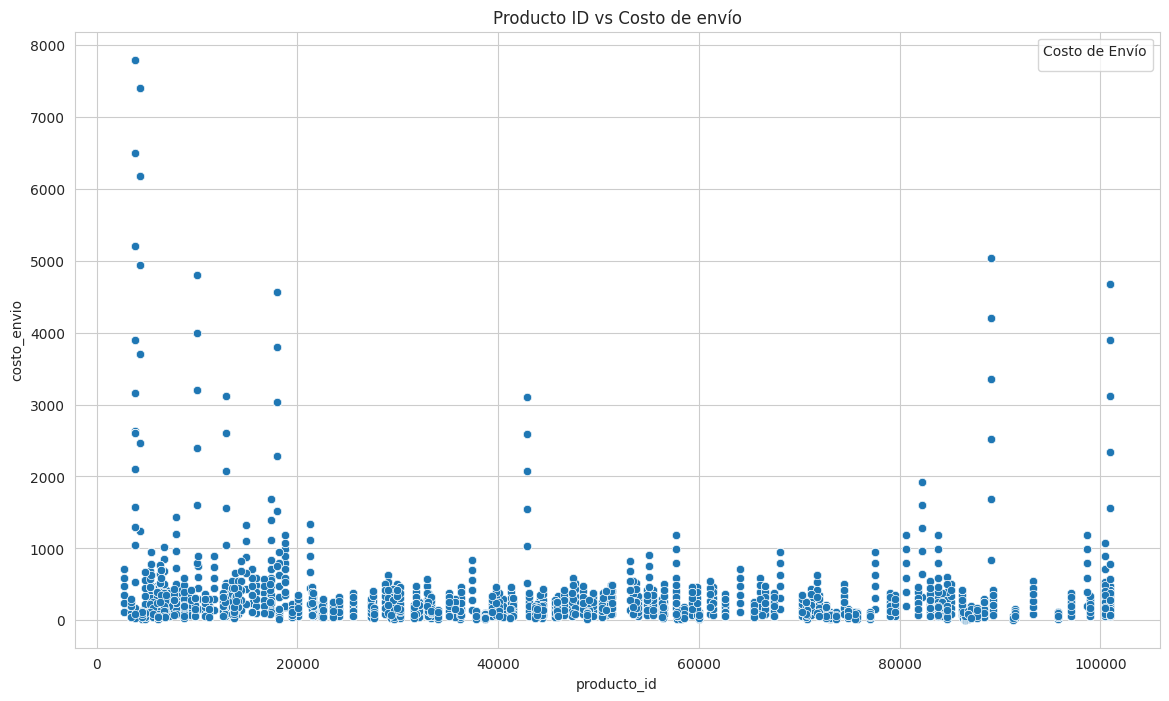

In [31]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_itens_pedidos_new, x='producto_id', y='costo_envio')

plt.title('Producto ID vs Costo de envío')
plt.legend(title='Costo de Envío')

# Mostrar el gráfico
plt.show()

* La mayoría de productos tienen costo de envío por debajo de los 1000 reales.
* Observando el gráfico y comparándolo con el costo unitario, notamos que acá varía un poco, ya que existe más costos de envío mayores de 1000 reales para más productos, por más que sus costos unitarios sean menores, esto también podría deberse a qué se están realizando varias compras conjuntas del mismo producto.
* Observamos que los productos que tenían el costo unitario mayor, tienen el costo de envío mayor, lo cual es entendible.

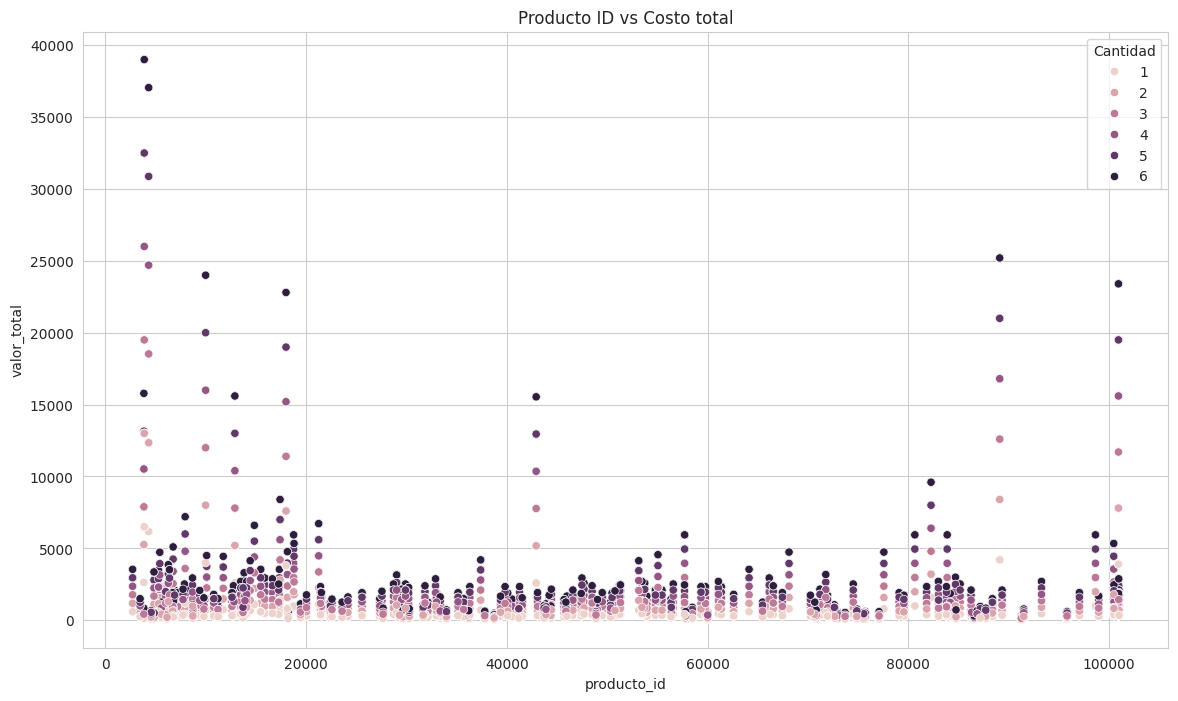

In [32]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_itens_pedidos_new, x='producto_id', y='valor_total', hue='cantidad')

plt.title('Producto ID vs Costo total')
plt.legend(title='Cantidad')

# Mostrar el gráfico
plt.show()

### 4.2 df_pedidos

<Axes: >

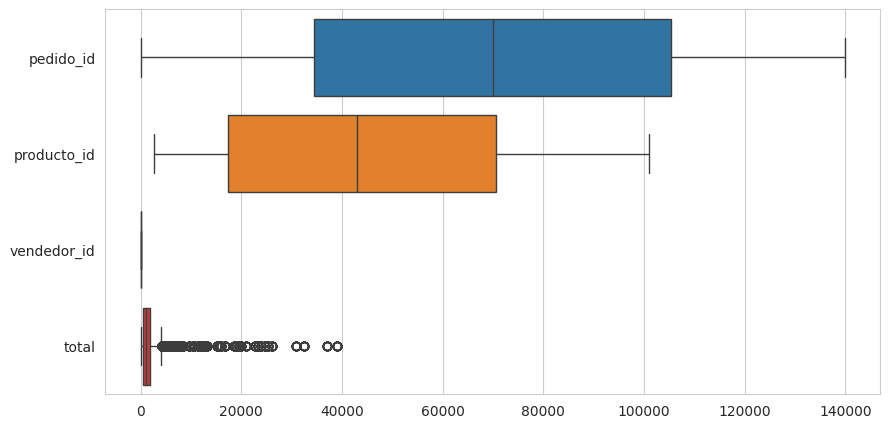

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(df_pedidos, orient='h')

* La gráfica nos muestra que en el costo total, hay productos que tienen precios muy elevados comparados con la media del costo del resto de productos.

In [34]:
## transformando la variable fecha
df_pedidos_new = df_pedidos.copy()
df_pedidos_new['year'] = df_pedidos_new['fecha_compra'].dt.year
df_pedidos_new['month'] = df_pedidos_new['fecha_compra'].dt.month
df_pedidos_new['day'] = df_pedidos_new['fecha_compra'].dt.day
df_pedidos_new.head(10)

,pedido_id,producto_id,vendedor_id,fecha_compra,total,year,month,day
0,341,41518,6,2019-01-05,780,2019,1,5
1,1174,4307,3,2019-01-05,30875,2019,1,5
2,1399,22407,1,2019-01-05,600,2019,1,5
3,1652,3820,4,2019-01-05,834,2019,1,5
4,2470,29012,2,2019-01-05,1575,2019,1,5
5,2980,72621,1,2019-01-05,537,2019,1,5
6,3443,86243,3,2019-01-05,1400,2019,1,5
7,3557,29012,4,2019-01-05,2625,2019,1,5
8,3585,61071,1,2019-01-05,1350,2019,1,5
9,3687,100961,3,2019-01-06,960,2019,1,6


In [35]:
year = df_pedidos_new.groupby('year')['total'].sum().reset_index()
year

,year,total
0,2019,15287366
1,2020,27227201
2,2021,3289363


<ipython-input-36-faade8bbd4fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year.year, y=year.total,palette="Set2",


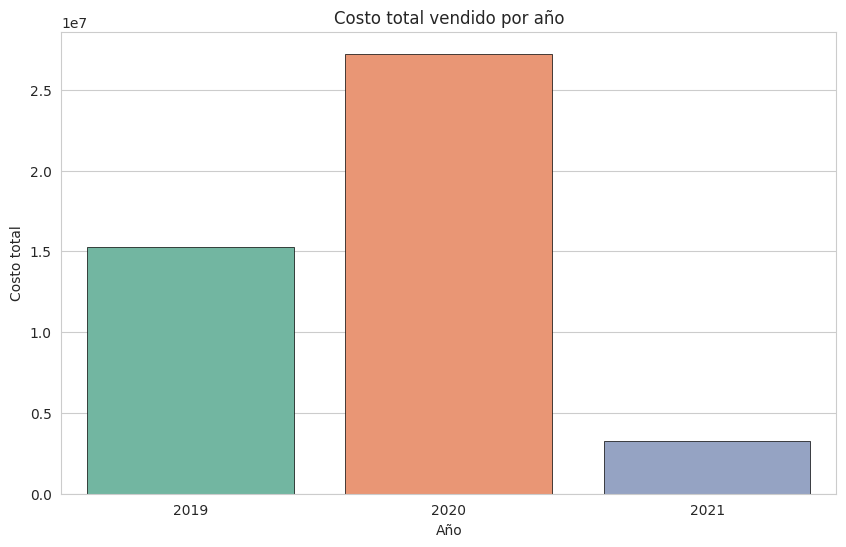

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=year.year, y=year.total,palette="Set2",
 edgecolor="black", linewidth=0.5)

plt.title('Costo total vendido por año')
plt.xlabel('Año')
plt.ylabel('Costo total')
plt.show()

In [37]:
vendedor = df_pedidos_new.groupby('vendedor_id')['total'].sum().reset_index()
vendedor

,vendedor_id,total
0,1,9694677
1,2,9633923
2,3,8942386
3,4,7822455
4,5,9709709
5,6,780


<ipython-input-38-5944e2fcd1c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendedor.vendedor_id, y=vendedor.total,


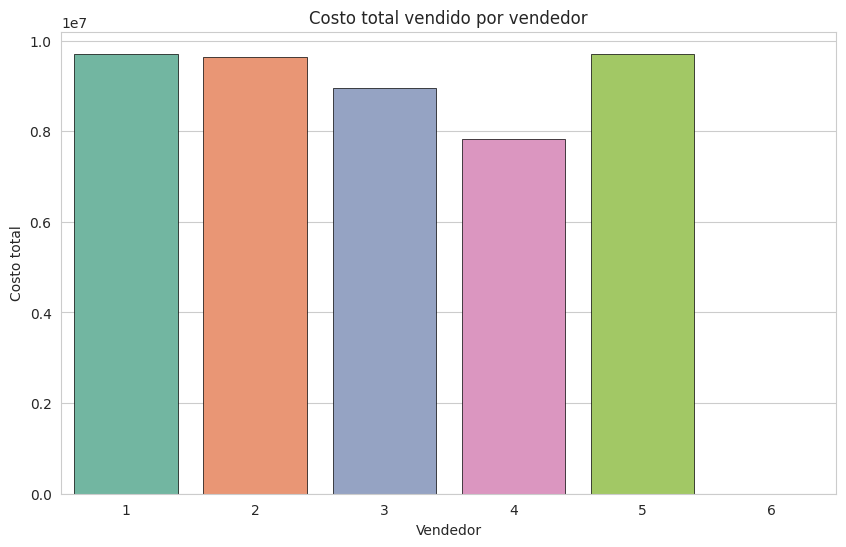

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=vendedor.vendedor_id, y=vendedor.total,
            palette="Set2", edgecolor="black", linewidth=0.5)

plt.title('Costo total vendido por vendedor')
plt.xlabel('Vendedor')
plt.ylabel('Costo total')
plt.show()

In [39]:
stacked = df_pedidos_new.groupby(['month','year'])['total'].sum().reset_index()
stacked

,month,year,total
0,1,2019,260616
1,1,2020,2458252
2,1,2021,2097109
3,2,2019,548144
4,2,2020,2168386
5,2,2021,1140729
6,3,2019,883559
7,3,2020,2472297
8,3,2021,51525
9,4,2019,904471


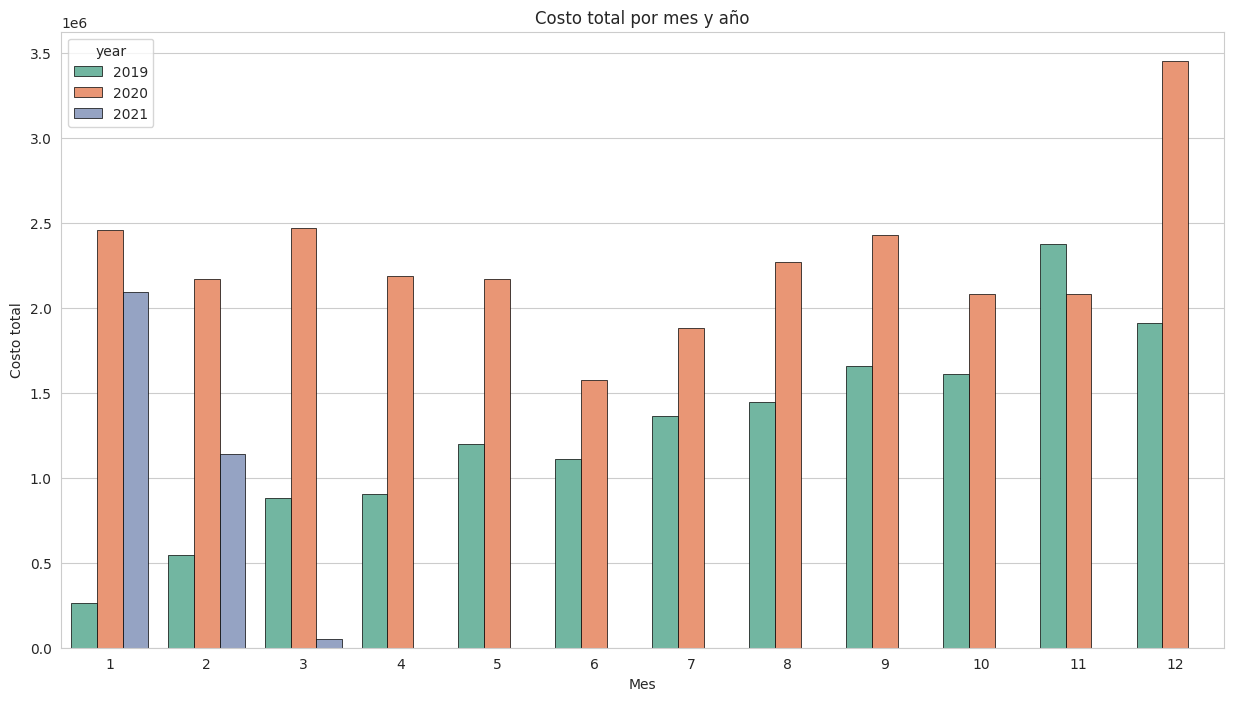

In [40]:

plt.figure(figsize=(15,8))
sns.barplot(x=stacked.month, y=stacked.total, hue=stacked.year,
             palette="Set2", edgecolor="black", linewidth=0.5)

plt.title('Costo total por mes y año')
plt.xlabel('Mes')
plt.ylabel('Costo total')
plt.show()

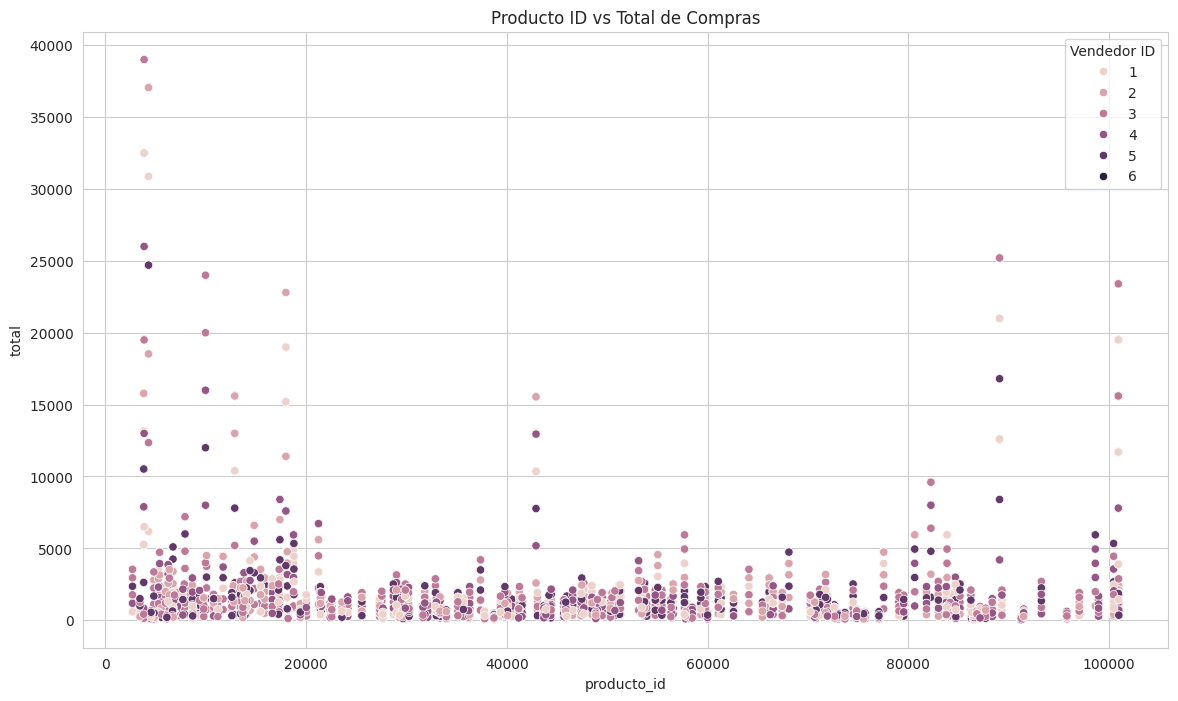

In [41]:

plt.figure(figsize=(14,8))
sns.scatterplot(data=df_pedidos_new, x='producto_id', y='total', hue='vendedor_id')

plt.title('Producto ID vs Total de Compras')
plt.legend(title='Vendedor ID')

# Mostrar el gráfico
plt.show()

### 4.3 df_productos

In [42]:
df_productos.head(10)

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
5,51238,Mala Bolsos Preta,410,Gap,286008,Usado
6,21429,Casaco Preto Botoes,390,Banana Republic,321380,Usado
7,44207,Calca Estampa Pb,290,Fyi,294021,Usado
8,79551,Shorts Jeans Destroyed,290,Sacada,213739,Usado
9,6262,Camiseta Eternity,644,Mixed,247015,Nuevo con etiqueta


<Axes: >

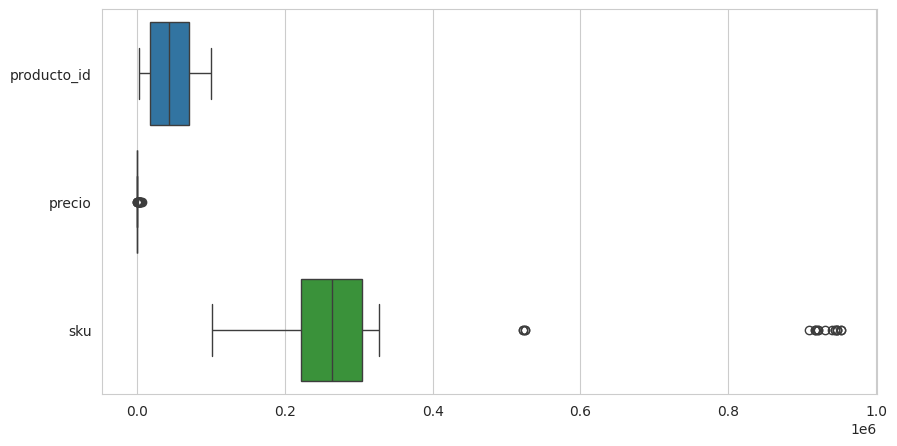

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(df_productos, orient='h')

In [44]:
condicion=df_productos.groupby('condicion')[['precio']].sum().reset_index()
condicion

,condicion,precio
0,Nuevo con etiqueta,11326
1,Nuevo sin etiqueta,3539
2,Usado,95017


<ipython-input-45-fd878b436737>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condicion.condicion, y=condicion.precio, palette="Set2", edgecolor="black", linewidth=0.5)


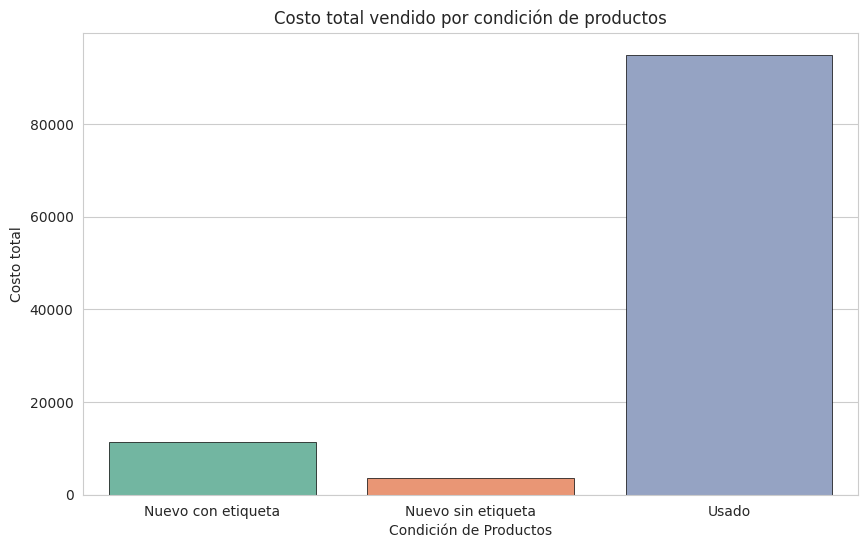

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=condicion.condicion, y=condicion.precio, palette="Set2", edgecolor="black", linewidth=0.5)

plt.title('Costo total vendido por condición de productos')
plt.xlabel('Condición de Productos')
plt.ylabel('Costo total')
plt.show()

* Según el gráfico, observamos que los productos usados son los que acumulados representan casi el costo total de precios

In [46]:
marca=df_productos.groupby('condicion')['marca'].count().reset_index()
marca

,condicion,marca
0,Nuevo con etiqueta,22
1,Nuevo sin etiqueta,7
2,Usado,176


<ipython-input-47-dfea4e232aff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marca.condicion, y = marca.marca,  palette="Set2", edgecolor="black", linewidth=0.5)


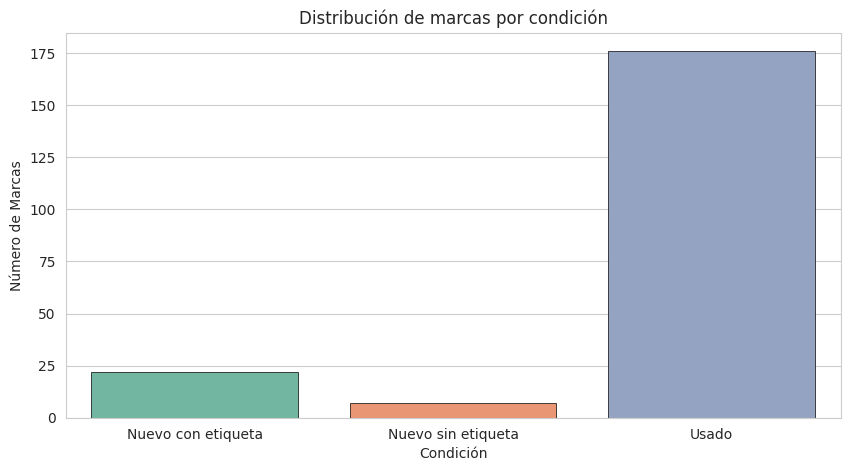

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x=marca.condicion, y = marca.marca,  palette="Set2", edgecolor="black", linewidth=0.5)

# Etiquetas y título del gráfico
plt.xlabel('Condición')
plt.ylabel('Número de Marcas')
plt.title('Distribución de marcas por condición')

# Muestra el gráfico
plt.show()

* Existen más marcas con la condición de Usado, un gran margen de diferencia del resto.

### 4.4 df_vendedores

In [48]:
## Veridicando nuestro dataframe 'df_vendedores'
df_vendedores

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca
5,6,Unknown


In [49]:
## Realizamos un join entre df_pedidos y df_vendedores
merged_df = pd.merge(df_pedidos_new, df_vendedores, on='vendedor_id', how='inner')
merged_df

,pedido_id,producto_id,vendedor_id,fecha_compra,total,year,month,day,nombre_vendedor
0,341,41518,6,2019-01-05,780,2019,1,5,Unknown
1,1174,4307,3,2019-01-05,30875,2019,1,5,Nadia Oliveira
2,3443,86243,3,2019-01-05,1400,2019,1,5,Nadia Oliveira
3,3687,100961,3,2019-01-06,960,2019,1,6,Nadia Oliveira
4,3870,59337,3,2019-01-07,1950,2019,1,7,Nadia Oliveira
...,...,...,...,...,...,...,...,...,...
24522,44447,83009,5,2021-02-21,1400,2021,2,21,Paulo Calanca
24523,47664,4553,5,2021-02-21,550,2021,2,21,Paulo Calanca
24524,48004,31835,5,2021-02-21,2394,2021,2,21,Paulo Calanca
24525,55759,12609,5,2021-03-07,1600,2021,3,7,Paulo Calanca


<ipython-input-50-6f967d90182b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_df.groupby('nombre_vendedor')['total'].sum().reset_index().nombre_vendedor, y=merged_df.groupby('nombre_vendedor')['total'].sum().reset_index().total,


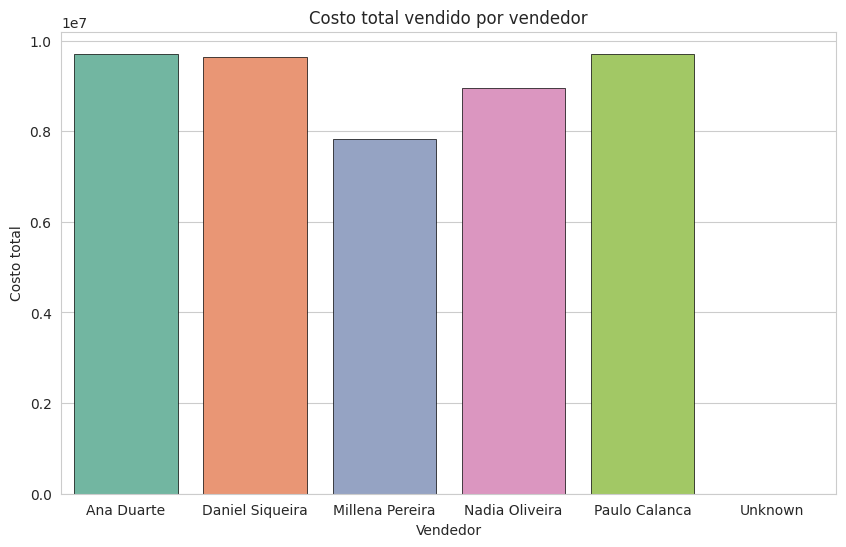

In [50]:
## Graficando costo total vendido por vendedor
plt.figure(figsize=(10,6))
sns.barplot(x=merged_df.groupby('nombre_vendedor')['total'].sum().reset_index().nombre_vendedor, y=merged_df.groupby('nombre_vendedor')['total'].sum().reset_index().total,
            palette="Set2", edgecolor="black", linewidth=0.5)

plt.title('Costo total vendido por vendedor')
plt.xlabel('Vendedor')
plt.ylabel('Costo total')
plt.show()

## 5. CREACIÓN DE BANCO DE DATOS

In [51]:
## Importando la librería a utilizar para crear base de datos
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [52]:
## Creamos un engine con el motor de banco de datos
database = create_engine('sqlite:///:memory:')
database

Engine(sqlite:///:memory:)

In [53]:
## Asignamos los dataframes a la base de datos en forma de tablas
df_itens_pedidos_new.to_sql('items_pedidos',database, index=False)
df_pedidos.to_sql('pedidos',database, index=False)
df_productos.to_sql('productos',database, index=False)
df_vendedores.to_sql('vendedores',database, index=False)

6

In [54]:
## Visualizando las tablas creadas dentro del motor de base de datos
inspector = inspect(database)
print('Tablas: ',inspector.get_table_names())

print('Columnas de Tabla Items Pedidos:')
for column in inspector.get_columns('items_pedidos'):
    print(column)
# database.dispose()

Tablas:  ['items_pedidos', 'pedidos', 'productos', 'vendedores']
Columnas de Tabla Items Pedidos:
{'name': 'producto_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'pedido_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'cantidad', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'valor_unitario', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'valor_total', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'ciudad', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'costo_envio', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}


* Conesto ya creamos nuestra base de datos en el motor de base de datos SQLITE

## PREGUNTA 1: ¿CUÁL ES EL TOP 5 PRODUCTOS MÁS VENDIDOS HISTORICAMENTE?

In [55]:
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado


In [56]:
df_itens_pedidos_new.head()

,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,41518,341,3,260,780,BR-BA,156.0
1,4307,1174,5,6175,30875,BR-RJ,6175.0
2,22407,1399,3,200,600,BR-PB,120.0
3,3820,1652,6,139,834,BR-DF,166.8
4,29012,2470,3,525,1575,BR-BA,315.0


In [57]:
## Realizando el query para conseguir el Top 5 de productos más vendidos
query = """SELECT t1.producto_id, t2.producto, t2.marca, sum(t1.cantidad) as cantidad_vendida, sum(t1.valor_total) as total_vendido
          FROM items_pedidos t1
          INNER JOIN productos t2 ON t2.producto_id = t1.producto_id
          GROUP BY t1.producto_id
          ORDER BY cantidad_vendida DESC
          LIMIT 5"""

In [58]:
df_top5_masvendidos = pd.read_sql(sql = text(query), con=database.connect())
df_top5_masvendidos['total_vendido'] = df_top5_masvendidos['total_vendido'].apply(lambda x : f'${round(x/1000)}K')
df_top5_masvendidos

,producto_id,producto,marca,cantidad_vendida,total_vendido
0,32126,Saia Midi Cinto,Limone By Jade Seba,549,$115K
1,13814,Vestido Nude Reta,Ellus,547,$301K
2,47405,Blusa Manga Estampa,Animale,536,$166K
3,33976,Camisa Xadrez Azul,Hollister,511,$61K
4,53941,Cropped Escritas Pb,Linda de Morrer,508,$142K


In [59]:
# https://stackoverflow.com/questions/61568935/seaborn-barplot-with-rounded-corners

<ipython-input-60-db3e23beaeb5>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-60-db3e23beaeb5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_top5_masvendidos.cantidad_vendida, y=df_top5_masvendidos.producto, orient='h', joinstyle='bevel', palette = colors)
<ipython-input-60-db3e23beaeb5>:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=df_top5_masvendidos.cantidad_vendida, y=df_top5_masvendidos.producto, orient='h', joinstyle='bevel',

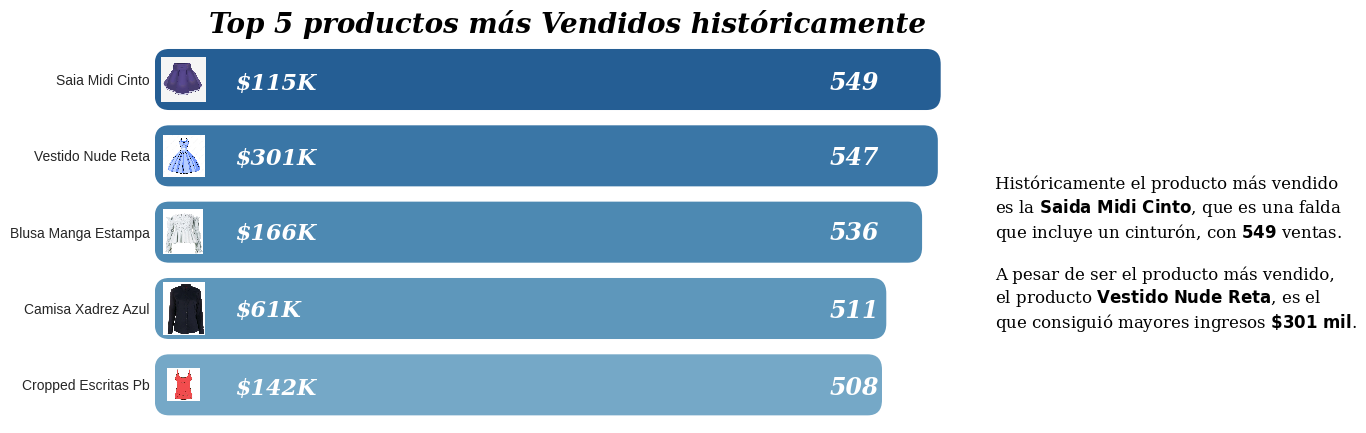

In [60]:
from matplotlib.patches import FancyBboxPatch
from PIL import Image

data = [210, 185, 165, 150, 130]
colors = plt.cm.Blues(data)

plt.subplots(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
ax = sns.barplot(x=df_top5_masvendidos.cantidad_vendida, y=df_top5_masvendidos.producto, orient='h', joinstyle='bevel', palette = colors)

new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0080,rounding_size=10",
                            ec="none", fc=color,
                            mutation_aspect=0.02
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

sns.despine(left=True, bottom=True)
ax.tick_params(axis=u'both', which=u'both', length=0)

# plt.rcParams['text.usetex'] = False

# Añadir texto de conclusión
conclusion_text = '''
Históricamente el producto más vendido
es la $\\bf{Saida\\ Midi\\ Cinto}$, que es una falda
que incluye un cinturón, con $\\bf{549}$ ventas.

A pesar de ser el producto más vendido,
el producto $\\bf{Vestido\\ Nude\\ Reta}$, es el
que consiguió mayores ingresos $\\bf{\\$301\\ mil}$.'''

plt.figtext(1, 0.5, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left')

# Ocultar las etiquetas del eje x
plt.gca().xaxis.set_visible(False)

# Configurar la etiqueta del eje y con un tipo de letra personalizado
plt.gca().set_ylabel('Eje Y', fontdict={'fontsize': 30, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'bold', 'color': 'black'})

# Ocultar las líneas del eje x
# plt.gca().spines['bottom'].set_linewidth(0)

lista = [0.81,0.66,0.51,0.355,0.20]

for index, i in enumerate(list(df_top5_masvendidos['total_vendido'])):
  plt.figtext(0.24, lista[index], i, fontdict={'fontsize': 16, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'white'})

for index, i in enumerate(list(df_top5_masvendidos['cantidad_vendida'])):
  plt.figtext(0.835, lista[index], i, fontdict={'fontsize': 17, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'white'})


import requests
from PIL import Image
from io import BytesIO

# URL de la imagen en GitHub

falda = 'https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/falda.jpg'
vestido = 'https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/vestido.jpg'
blusa = 'https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/blusa.jpg'
camisa = 'https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/camisa.jpg'
cropped = 'https://raw.githubusercontent.com/davidcarrillo10288/Store_Sales_Analysis/master/cropped.jpeg'

imagenes = [falda,vestido,blusa,camisa,cropped]
imagenes_open = []

for i in imagenes:
  # Descargar la imagen con requests
  response = requests.get(i)

  # Verificar que la solicitud fue exitosa
  if response.status_code == 200:
      # Leer la imagen desde la respuesta
      imagen_data = BytesIO(response.content)

      # Abrir la imagen con PIL
      imagen = Image.open(imagen_data)
      imagenes_open.append(imagen)
  else:
      print(f"No se pudo descargar la imagen. Código de estado HTTP: {response.status_code}")

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
lista_2 = [0,1,2,3,4]
for index, i in enumerate(imagenes_open):
  if index == 1:
    imagebox = OffsetImage(i, zoom=0.03)  # Ajustar el tamaño de la imagen según sea necesario
  else:
    imagebox = OffsetImage(i, zoom=0.05)
  x_pos = 20  # Mover un poco a la derecha del valor máximo
  y_pos = lista_2[index]
  ab = AnnotationBbox(imagebox, (x_pos, y_pos), frameon=False, pad=0.2)
  ax.add_artist(ab)

plt.title('Top 5 productos más Vendidos históricamente', fontdict={'fontsize': 20, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.tight_layout()
plt.show()

## PREGUNTA 2. ¿CUÁL ES EL EVOLUCIÓN HISTÓRICA DE LOS INGRESOS NETOS?

In [61]:
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [62]:
df_itens_pedidos_new.head()

,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,41518,341,3,260,780,BR-BA,156.0
1,4307,1174,5,6175,30875,BR-RJ,6175.0
2,22407,1399,3,200,600,BR-PB,120.0
3,3820,1652,6,139,834,BR-DF,166.8
4,29012,2470,3,525,1575,BR-BA,315.0


In [63]:
query = """
Select t1.fecha_compra, sum(t2.valor_total - t2.costo_envio) as total_ventas
From pedidos as t1
inner join items_pedidos as t2
on t2.pedido_id = t1.pedido_id
Group by t1.fecha_compra
Order by t1.fecha_compra asc

"""

In [64]:
df = pd.read_sql(sql = text(query), con=database.connect())
df.head()

,fecha_compra,total_ventas
0,2019-01-05 00:00:00.000000,32460.8
1,2019-01-06 00:00:00.000000,1728.0
2,2019-01-07 00:00:00.000000,1560.0
3,2019-01-08 00:00:00.000000,1024.0
4,2019-01-09 00:00:00.000000,400.0


In [65]:
## Verificando si las columnas tienen el tipo de datos correcto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha_compra  780 non-null    object 
 1   total_ventas  780 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [66]:
## Convirtiendo la columna fecha_compras en tipo de datos datetime
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])
# df['fecha_compra'] = df['fecha_compra'].dt.date
# df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])
print(df['fecha_compra'].dtype)

datetime64[ns]


In [67]:
df.head()

,fecha_compra,total_ventas
0,2019-01-05,32460.8
1,2019-01-06,1728.0
2,2019-01-07,1560.0
3,2019-01-08,1024.0
4,2019-01-09,400.0


In [68]:
## Para el gráfico de pie, verificamos la fecha y el monto donde se consiguieron mayores ventas netas
df[df['total_ventas'] == max(df['total_ventas'])]

,fecha_compra,total_ventas
323,2019-11-24,289960.8


In [69]:
df_pedidos

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [70]:
df_productos

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [71]:
query = """
Select sum(t2.valor_total - t2.costo_envio) as total_ventas, t3.marca
From pedidos as t1
inner join items_pedidos as t2
on t2.pedido_id = t1.pedido_id
inner join productos as t3
on t3.producto_id = t2.producto_id
where strftime('%Y-%m-%d', t1.fecha_compra) == '2019-11-24'
group by t3.marca
order by total_ventas Desc
"""
df_pie = pd.read_sql(sql = text(query), con=database.connect())
df_pie

,total_ventas,marca
0,20160.0,Barbara Bela
1,19200.0,Givenchy
2,18683.2,Mixed
3,13904.0,Tory Burch
4,12432.0,Jimmy Choo
...,...,...
81,208.0,Forever 21
82,192.0,Erre Erre
83,168.0,Limone By Jade Seba
84,111.2,Carter’s


In [72]:
df_pie_new = pd.concat([df_pie.head(5),pd.DataFrame({'total_ventas': [df_pie[5:]['total_ventas'].sum()] , 'marca': ['Others']})])
df_pie_new

,total_ventas,marca
0,20160.0,Barbara Bela
1,19200.0,Givenchy
2,18683.2,Mixed
3,13904.0,Tory Burch
4,12432.0,Jimmy Choo
0,205581.6,Others


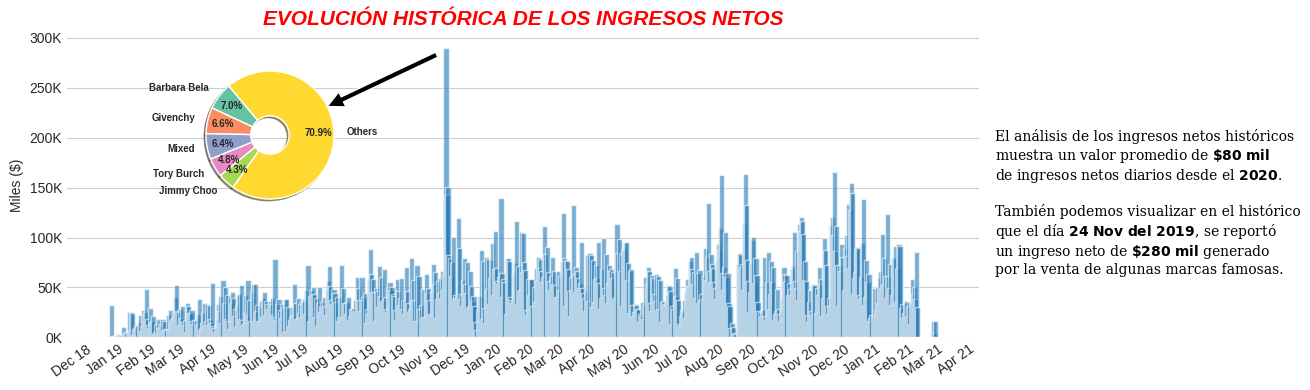

In [73]:
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(10,4))
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])
# Crear un gráfico de barras con los datos de 'df'
plt.bar(df['fecha_compra'], df['total_ventas'], width=5,align='edge',alpha=0.6)

# Añadir formateo al eje Y con números enteros y "K" para miles
def mil_formatter(x, _):
    return f'{int(x/1e3)}K'
plt.gca().yaxis.set_major_formatter(FuncFormatter(mil_formatter))

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

# Eliminar las líneas de los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


# Añadir texto de conclusión
conclusion_text = '''
El análisis de los ingresos netos históricos
muestra un valor promedio de $\\bf{\\$80\\ mil}$
de ingresos netos diarios desde el $\\bf{2020}$.

También podemos visualizar en el histórico
que el día $\\bf{24\\ Nov\\ del\\ 2019}$, se reportó
un ingreso neto de $\\bf{\\$280\\ mil}$ generado
por la venta de algunas marcas famosas.'''

plt.figtext(1, 0.5, conclusion_text, fontdict={'fontsize': 10, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left')


# Labels y títulos
plt.ylabel('Miles ($)')
plt.xlabel('')
plt.title('EVOLUCIÓN HISTÓRICA DE LOS INGRESOS NETOS', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'red',
    'family': 'sans-serif',
    'style': 'italic'})
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()


## **********************   Gráfico de Pie   ***********************************************
# Definir un nuevo eje para el gráfico de pie
# Los argumentos son las coordenadas del rectángulo donde se inserta el gráfico de pie:
# [x, y, width, height], donde x e y son las coordenadas de la esquina inferior izquierda
# en valores de la figura (no del eje) y width y height son el tamaño relativo.
ax_pie = plt.axes([0.075, 0.45, 0.4, 0.4])

data = [210, 200, 180, 170, 150, 140, 120, 100, 80, 70, 70, 60, 60, 50]
colors = plt.cm.Blues(data)
colors2 = plt.cm.viridis(data)

# Crear gráfico de pie en el nuevo eje
ax_pie.pie(df_pie_new['total_ventas'], labels=df_pie_new['marca'],autopct='%1.1f%%', textprops={'fontsize': 7,'weight': 'bold'}, pctdistance=0.75,
        startangle=130, wedgeprops=dict(width=0.7, edgecolor='w'), labeldistance=1.2, colors=plt.cm.Set2.colors, shadow=True)

# Eliminar los ejes del gráfico de pie (opcional)
ax_pie.axis('off')

# Añadir la anotación (flecha) a la gráfica
plt.annotate('',
             xy=(0.8, 0.4),
             xytext=(2.7, 1.3),  # Posición de la anotación
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)
plt.show()

## PREGUNTA 3. ¿CUALES SON LOS INGRESOS NETOS POR VENDEDOR POR AÑO?

In [74]:
df_vendedores

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca
5,6,Unknown


In [75]:
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [76]:
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [77]:
# query = """
# Select sum(t1.valor_total - t1.costo_envio) as valor_neto, t3.nombre_vendedor, strftime('%Y', t2.fecha_compra) AS año
# From items_pedidos as t1
# inner join pedidos as t2
# on t2.pedido_id = t1.pedido_id
# inner join vendedores as t3
# on t2.vendedor_id = t3.vendedor_id
# group by nombre_vendedor, año
# """

query = """
SELECT
    t3.nombre_vendedor,
    SUM(CASE WHEN strftime('%Y', t2.fecha_compra) = '2019' THEN (t1.valor_total - t1.costo_envio) ELSE 0 END) AS "2019",
    SUM(CASE WHEN strftime('%Y', t2.fecha_compra) = '2020' THEN (t1.valor_total - t1.costo_envio) ELSE 0 END) AS "2020",
    SUM(CASE WHEN strftime('%Y', t2.fecha_compra) = '2021' THEN (t1.valor_total - t1.costo_envio) ELSE 0 END) AS "2021"
FROM
    items_pedidos AS t1
INNER JOIN
    pedidos AS t2 ON t2.pedido_id = t1.pedido_id
INNER JOIN
    vendedores AS t3 ON t2.vendedor_id = t3.vendedor_id
GROUP BY
    t3.nombre_vendedor
"""

df_vendedor_neto = pd.read_sql(sql = text(query), con=database.connect())
# Establecer 'nombre_vendedor' como el índice del DataFrame
df_vendedor_neto.set_index('nombre_vendedor', inplace=True)
# Eliminar la fila con el índice 'Unknown'
df_vendedor_neto = df_vendedor_neto.drop(index='Unknown')
df_vendedor_neto

,2019,2020,2021
nombre_vendedor,,,
Ana Duarte,2154261.6,5054009.6,547470.4
Daniel Siqueira,2020503.2,5266932.8,419702.4
Millena Pereira,2054682.4,3804385.6,398896.0
Nadia Oliveira,2296986.4,4046902.4,810020.0
Paulo Calanca,3702835.2,3609530.4,455401.6


<Figure size 1000x400 with 0 Axes>

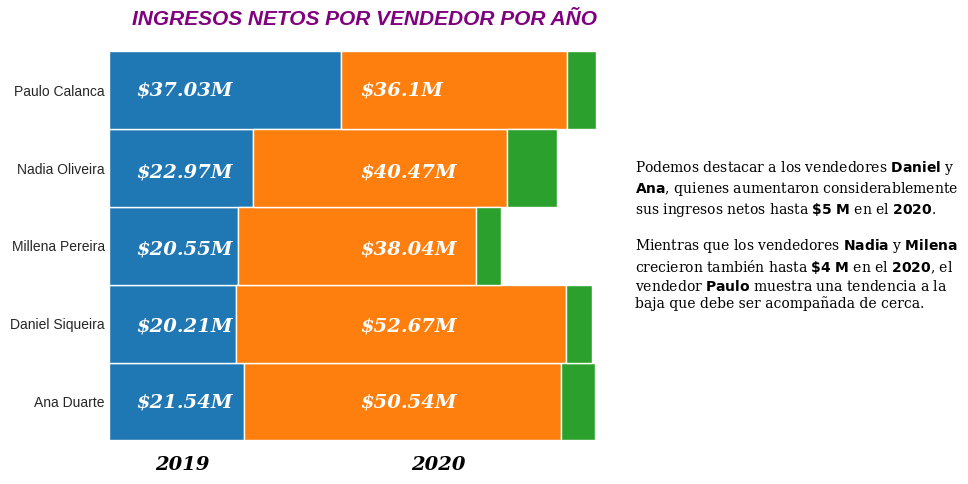

In [78]:
# Crear el gráfico de barras horizontales apiladas
plt.figure(figsize=(10, 4))
df_vendedor_neto.plot.barh(stacked=True, width=1, legend=False)

# Eliminar las líneas de los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Ocultar las etiquetas del eje x
plt.gca().xaxis.set_visible(False)

# Añadir texto de conclusión
conclusion_text = '''
Podemos destacar a los vendedores $\\bf{Daniel}$ y
$\\bf{Ana}$, quienes aumentaron considerablemente
sus ingresos netos hasta $\\bf{\\$5\\ M}$ en el $\\bf{2020}$.

Mientras que los vendedores $\\bf{Nadia}$ y $\\bf{Milena}$
crecieron también hasta $\\bf{\\$4\\ M}$ en el $\\bf{2020}$, el
vendedor $\\bf{Paulo}$ muestra una tendencia a la
baja que debe ser acompañada de cerca.
'''

plt.figtext(1, 0.5, conclusion_text, fontdict={'fontsize': 10, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left')


## Colocando los valores en las barras horizontales
lista = [0.14,0.3,0.46,0.62,0.79]

for index, i in enumerate(list(df_vendedor_neto['2020'])):
  i = f'${round(i/100000,2)}M'
  plt.figtext(0.57, lista[index], i, fontdict={'fontsize': 14, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'white'})

for index, i in enumerate(list(df_vendedor_neto['2019'])):
  i = f'${round(i/100000,2)}M'
  plt.figtext(0.22, lista[index], i, fontdict={'fontsize': 14, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'white'})

plt.figtext(0.25, 0.01, "2019", fontdict={'fontsize': 14, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'black'})
plt.figtext(0.65, 0.01, "2020", fontdict={'fontsize': 14, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'black'})

# Labels y títulos
plt.ylabel('')
plt.xlabel('')
plt.title('INGRESOS NETOS POR VENDEDOR POR AÑO', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'purple',
    'family': 'sans-serif',
    'style': 'italic'}, pad=5)
plt.grid(False)
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

## PREGUNTA 4. ¿CUALES SON LAS CIUDADES QUE PROPORCIONAN MAYORES INGRESOS NETOS?

In [79]:
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [80]:
df_itens_pedidos_new.head()

,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,41518,341,3,260,780,BR-BA,156.0
1,4307,1174,5,6175,30875,BR-RJ,6175.0
2,22407,1399,3,200,600,BR-PB,120.0
3,3820,1652,6,139,834,BR-DF,166.8
4,29012,2470,3,525,1575,BR-BA,315.0


In [88]:
query = """
select t2.ciudad, sum(t1.total - t2.costo_envio) as ingresos_netos
from pedidos as t1
Inner join items_pedidos as t2
on t2.pedido_id = t1.pedido_id
Group by t2.ciudad
"""


df_ciudad = pd.read_sql(sql = text(query), con=database.connect())
df_ciudad['abbrev_state'] = df_ciudad['ciudad'].apply(lambda x :x[3:])
df_ciudad.head(6)

,ciudad,ingresos_netos,abbrev_state
0,BR-AC,1128520.0,AC
1,BR-AL,1522016.0,AL
2,BR-AM,1244092.8,AM
3,BR-AP,1475737.6,AP
4,BR-BA,1322517.6,BA
5,BR-CE,1468080.8,CE


In [85]:
!pip install geobr
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.3
    Uninstalling shapely-2.0.3:
      Successfully uninstalled shapely-2.0.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [86]:
import geobr
import geopandas as gpd

In [89]:
geo_brasil = geobr.read_state(code_state = 'all')
geo_brasil.head(8)

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."


In [90]:

## Hacemos un merge para combinar los dataframes
geo_brasil_merged = pd.merge(df_ciudad, geo_brasil, on = 'abbrev_state', how='left')
geo_brasil_merged

,ciudad,ingresos_netos,abbrev_state,code_state,name_state,code_region,name_region,geometry
0,BR-AC,1128520.0,AC,12.0,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
1,BR-AL,1522016.0,AL,27.0,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ..."
2,BR-AM,1244092.8,AM,13.0,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,BR-AP,1475737.6,AP,16.0,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
4,BR-BA,1322517.6,BA,29.0,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ..."
5,BR-CE,1468080.8,CE,23.0,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."
6,BR-DF,1327094.4,DF,53.0,Distrito Federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.57461 -15.51341, -47.56997..."
7,BR-ES,1275874.4,ES,32.0,Espirito Santo,3.0,Sudeste,"MULTIPOLYGON (((-41.87545 -20.76487, -41.87920..."
8,BR-GO,1418205.6,GO,52.0,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-50.16015 -12.42007, -50.15856..."
9,BR-MA,1453059.2,MA,21.0,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."


In [92]:
# Crear un DataFrame GeoPandas a partir de tu DataFramxisten
gdf = gpd.GeoDataFrame(geo_brasil_merged, geometry='geometry')
gdf.head(10)

,ciudad,ingresos_netos,abbrev_state,code_state,name_state,code_region,name_region,geometry
0,BR-AC,1128520.0,AC,12.0,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
1,BR-AL,1522016.0,AL,27.0,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ..."
2,BR-AM,1244092.8,AM,13.0,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,BR-AP,1475737.6,AP,16.0,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
4,BR-BA,1322517.6,BA,29.0,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ..."
5,BR-CE,1468080.8,CE,23.0,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."
6,BR-DF,1327094.4,DF,53.0,Distrito Federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.57461 -15.51341, -47.56997..."
7,BR-ES,1275874.4,ES,32.0,Espirito Santo,3.0,Sudeste,"MULTIPOLYGON (((-41.87545 -20.76487, -41.87920..."
8,BR-GO,1418205.6,GO,52.0,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-50.16015 -12.42007, -50.15856..."
9,BR-MA,1453059.2,MA,21.0,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."


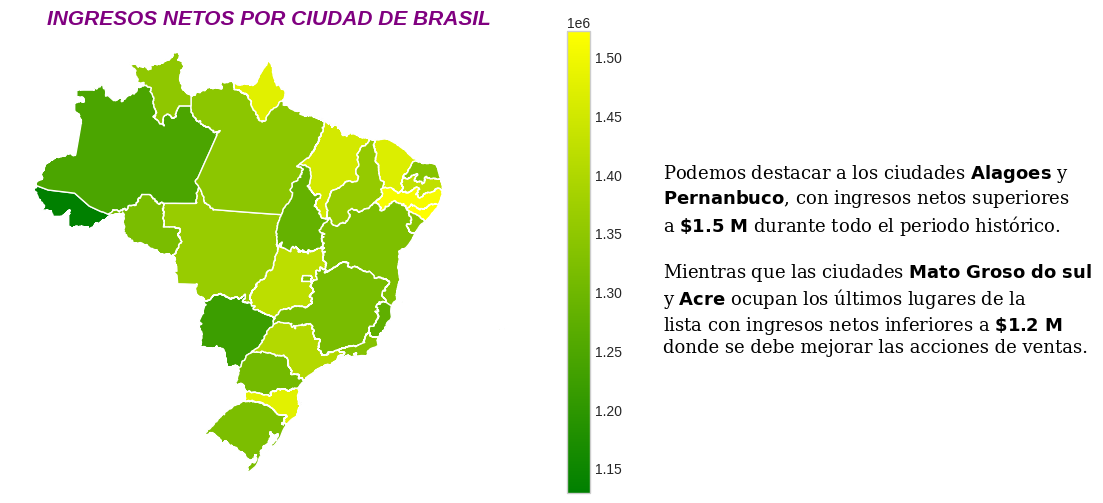

In [115]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter, FormatStrFormatter

# Define a colormap that varies from green to yellow
cmap = mcolors.LinearSegmentedColormap.from_list('green_to_yellow', ['green', 'yellow'])

# Plot the geodataframe with the specified colormap
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column='ingresos_netos', cmap=cmap, ax=ax, legend = 'ingresos_netos')

# Add a color bar to the plot
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#cbar = plt.colorbar(cmap=cmap, cax=cax)
#cbar.set_label('ingresos_netos')

plt.grid(False)
# Eliminar las líneas de los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Ocultar las etiquetas del eje x - y
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

# Añadir texto de conclusión
conclusion_text = '''
Podemos destacar a los ciudades $\\bf{Alagoes}$ y
$\\bf{Pernanbuco}$, con ingresos netos superiores
a $\\bf{\\$1.5\\ M}$ durante todo el periodo histórico.

Mientras que las ciudades $\\bf{Mato\\ Groso\\ do\\ sul}$
y $\\bf{Acre}$ ocupan los últimos lugares de la
lista con ingresos netos inferiores a $\\bf{\\$1.2\\ M}$
donde se debe mejorar las acciones de ventas.
'''

plt.figtext(0.88, 0.5, conclusion_text, fontdict={'fontsize': 13, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left')



# Format the legend labels with a dollar sign and a multiplier
handles, labels = ax.get_legend_handles_labels()
formatter = FuncFormatter(lambda x, _: '$' + str(round(x / 1000000, 1)) + ' M')
labels = [formatter(label) for label in labels]
ax.legend(handles, labels, loc='upper left')

plt.title('INGRESOS NETOS POR CIUDAD DE BRASIL', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'purple',
    'family': 'sans-serif',
    'style': 'italic'}, pad=5)
plt.show()